# **Lista 6 - Kmédias e PCA**

## Aprendizagem de Máquina - 2022.1
## Matheus do Vale Almeida - 473219


---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
# Dados para a Questão 01 ======================================================
datasetQ1 = "quake"
XQ1 = np.genfromtxt(f"{datasetQ1}.csv", delimiter=',')
dsQ1_Nsamples  = XQ1.shape[0]
dsQ1_Nfeatures = XQ1.shape[1]
print("============= Quake.csv ==============")
print(f"Número de amostras  - datasetQ1: {dsQ1_Nsamples}")
print(f"Número de dimensões - datasetQ1: {dsQ1_Nfeatures}\n")

escalaQ1 = StandardScaler()
escalaQ1.fit(XQ1)
XQ1_norm = escalaQ1.transform(XQ1)

# Dados para a Questão 02 ======================================================
datasetQ2 = "penguins"
dsQ2 = np.genfromtxt(f"{datasetQ2}.csv", delimiter=',')
XQ2 = dsQ2[:,:-1]
yQ2 = dsQ2[:,-1].astype(int)

print("============= Penguins.csv ===========")
print(f"Número de amostras  - datasetQ1: {XQ2.shape[0]}")
print(f"Número de dimensões - datasetQ1: {XQ2.shape[1]}")
print(f"Número de classes   - datasetQ1: {np.unique(yQ2).shape[0]}\n")

escalaQ2 = StandardScaler()
escalaQ2.fit(XQ2)
XQ2_norm = escalaQ2.transform(XQ2)

============= Quake.csv ==============
Número de amostras  - datasetQ1: 2178
Número de dimensões - datasetQ1: 2

============= Penguins.csv ===========
Número de amostras  - datasetQ1: 333
Número de dimensões - datasetQ1: 4
Número de classes   - datasetQ1: 3



## Questão 01

---


In [3]:
# Distância Euclidiana
def dist_euclidiana(xi, xj):
    return np.sqrt(np.sum((xi - xj) ** 2))

In [4]:
# Índice Davis-Bouldin (DB)
def DB(K, X, clusters, centroides):
    DB_index = []

    for cluster_k, clusterK in enumerate(clusters):
        simil_bw_clusters = []
        within_cluster_scatter1 = np.mean( dist_euclidiana(X[clusterK], centroides[cluster_k]))

        for cluster_i, clusterI in enumerate(clusters):
            if(cluster_k != cluster_i):
                within_cluster_scatter2  = np.mean( dist_euclidiana(X[clusterI], centroides[cluster_i]))
                bw_cluster_dist          = dist_euclidiana( centroides[cluster_k], centroides[cluster_i] )

                simil_bw_clusters.append((within_cluster_scatter1 + within_cluster_scatter2) / bw_cluster_dist)
        DB_index.append( simil_bw_clusters[np.argmax(simil_bw_clusters)] )

    return np.mean(DB_index, axis=0)

In [5]:
# Erro de quantização ou Erro de Reconstrução
def erro_de_reconstrucao(X, clusters, centroides):
    rec_error = 0.0
    for cluster_i, cluster in enumerate(clusters):
        rec_error += dist_euclidiana( X[cluster], centroides[cluster_i] )

    return rec_error

In [6]:
# Funções auxiliares para ajudar na execução do K-médias =======================
def centroid_proximo(sample, centroides):
    distancias = [
        dist_euclidiana(sample, point) for point in centroides
    ]
    
    proximo = np.argmin(distancias)

    return proximo

# Encontrar todas partições Ck, k = 1,..., K:
def buscar_clusters(K, X, centroides):
    clusters = [[] for _ in range(K)]

    for i, sample in enumerate(X):
        centroide_i = centroid_proximo(sample, centroides)
        clusters[centroide_i].append(i)

    return clusters

# Recalculo da mudança dos centroides em relação a seus clusters
def mk(K, X, clusters):
    centroides = np.zeros((K, dsQ1_Nfeatures))

    for cluster_i, cluster in enumerate(clusters):
        cluster_media = np.mean(X[cluster], axis=0)
        centroides[cluster_i] = cluster_media

    return centroides

# Distancia entre os centroides, antigos e atuais
def is_converged(K, old_centroides, centroides):
    distancias = [
        dist_euclidiana(old_centroides[i], centroides[i]) for i in range(K)
    ]

    return sum(distancias) <= 0.00001

In [9]:
np.random.seed(12345)

# Algoritmo K-médias
def Kmedias(K, X):
    centroides = []
    clusters = [[] for _ in range(K)]
    
    # Escolha aleatoria inicial dos centroides
    random_sample_i = np.random.choice(dsQ1_Nsamples, K, replace=False)
    centroides = [X[idx] for idx in random_sample_i]

    # Otimização coordenada
    while True:
        # encontrar todas partições Ck, k = 1,..., K:
        clusters = buscar_clusters(K, X, centroides)

        # recalcular os centroides dos clusters
        old_centroides = centroides
        centroides = mk(K, X, clusters)

        # verificar se os centroides apresentam grandes modificações
        if (is_converged(K, old_centroides, centroides)):
            break

    rec_error = erro_de_reconstrucao(X, clusters, centroides)
    DB_index  = DB(K, X, clusters, centroides)

    return centroides, rec_error, DB_index

In [49]:
best_DB_index  = []
best_rec_error = []

for K in range(4, 21):
    dados      = []
    centroides = []
    rec_error  = []
    DB_index   = []

    for i in range(21):
        dados.append(Kmedias(K, XQ1_norm))
        centroides.append(dados[0][0])
        rec_error.append(dados[0][1])
        DB_index.append(dados[0][2])
    best = np.argmin(rec_error)

    best_rec_error.append(rec_error[best])
    best_DB_index.append(DB_index[best])

    print(f"--------------------- K = {K} ---------------------")
    print(f"Reconstruction error = {best_rec_error[K-4]:.2f}; DB index = {best_DB_index[K-4]:.4f}\n")

--------------------- K = 4 ---------------------
Reconstruction error = 53.50; DB index = 15.0531

--------------------- K = 5 ---------------------
Reconstruction error = 50.16; DB index = 14.4125

--------------------- K = 6 ---------------------
Reconstruction error = 55.54; DB index = 16.8966

--------------------- K = 7 ---------------------
Reconstruction error = 55.95; DB index = 18.0076

--------------------- K = 8 ---------------------
Reconstruction error = 49.43; DB index = 12.9956

--------------------- K = 9 ---------------------
Reconstruction error = 50.91; DB index = 12.9628

--------------------- K = 10 ---------------------
Reconstruction error = 45.33; DB index = 11.4798

--------------------- K = 11 ---------------------
Reconstruction error = 45.26; DB index = 11.0652

--------------------- K = 12 ---------------------
Reconstruction error = 44.92; DB index = 10.0436

--------------------- K = 13 ---------------------
Reconstruction error = 45.68; DB index = 11.44

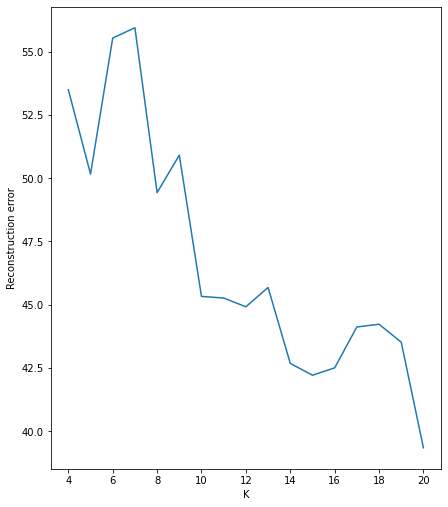

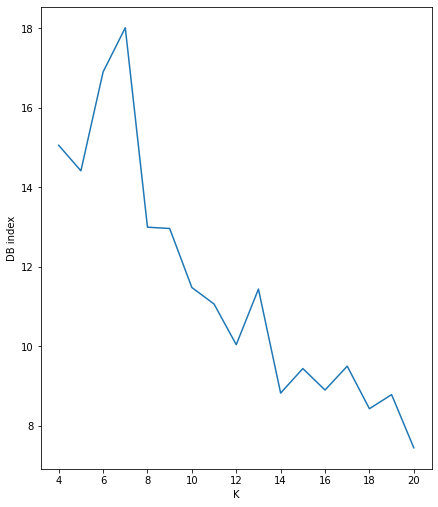

In [50]:
K_ = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.figure(figsize=(7,8.5))
plt.plot(K_, best_rec_error)
plt.xlabel('K')
plt.ylabel('Reconstruction error')
plt.show()

plt.figure(figsize=(7,8.5))
plt.plot(K_, best_DB_index)
plt.xlabel('K')
plt.ylabel('DB index')
plt.show()

## Questão 02

---


In [16]:
# Algoritmo PCA (Análise dos Componentes Principais)
def PCA(X, n):
    media = np.mean(X, axis=0)
    X = X - media

    # calcule a matriz de covariância do dados
    m_cov = np.cov(X.T)

    # encontre os M Autovetores da m_cov correspondentes aos M maiores Autovalores
    autovalores, autovetores = np.linalg.eig(m_cov)

    # os M Autovetores selecionados formarão as linhas da matriz de projeção
    autovetores = autovetores.T
    idxs = np.argsort(autovalores)[::-1]

    autovalores = autovalores[idxs]
    autovetores = autovetores[idxs]

    # primeiros n Autovetores em componentes
    componentes = autovetores[0:n]
    
    # variancia explicada:
    var_expl = np.sum(autovalores)

    # projeção dos dados
    X = X - media
    return var_expl, np.dot(X, componentes.T)

 ============ Projeção dos dados ============
datasetQ2: (333, 4)
datasetQ2 - projetado: (333, 2)


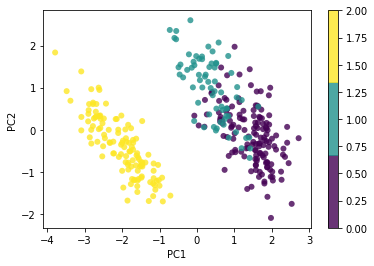

In [42]:
var_expl2, projecao2 = PCA(XQ2_norm, 2)
print(" ============ Projeção dos dados ============")
print(f"datasetQ2: {XQ2.shape}")
print(f"datasetQ2 - projetado: {projecao2.shape}")

pc1 = projecao2[:, 0]
pc2 = projecao2[:, 1]

plt.scatter(pc1, pc2, c=yQ2, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

4.012048192771087 4.012048192771087


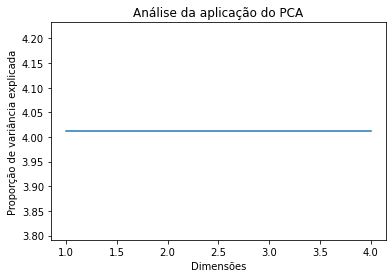

In [41]:
var_expl3, projecao3 = PCA(projecao2, 3)

print("Variancia explicada quando modificada")
print(var_expl2, var_expl3)